# Machine-Learning Model for Chatbot Replies Chatbot 







In [3]:
#Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

#Classifier Model libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier

#Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Basic Libraries
import pandas as pd
import numpy as np

#Text Libraries
import nltk 
import string
import re

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# other
import pickle
import os
import warnings
warnings.filterwarnings("ignore")
import random
from scipy.spatial import distance

In [ ]:
#Rooth Path
#Drive Mount
root_path = "/content/drive/MyDrive/FinalYearProject/Dataset/"
resource_root_path = "/content/drive/MyDrive/FinalYearProject/Dataset/"

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Dataset

In [ ]:
#Read Dataset from the Datasets folder
df = pd.read_csv(root_path+'Chatbot Dataset.csv',encoding='ISO-8859-1')
df = df.dropna(axis=0)
df

,User,Chatbot,Intent
0,Hello,Hi <HUMAN> how are you?,Greeting
1,Hi,Hello <HUMAN> how are you?,Greeting
2,Hola,Hi <HUMAN> how are you?,Greeting
3,Hi there,Hi <HUMAN> how are you?,Greeting
4,Hya there,Hi <HUMAN> how are you?,Greeting
...,...,...,...
2295,Today I meditated for 30 minutes and I feel am...,I am glad you felt better after meditating,Surprise_Amazed
2296,I broke my foot,I am sorry to hear your foot broke,Health
2297,I broke my foot,I am sorry to hear you broke your foot,Health
2298,My boss gave me priase in front of the group a...,I am glad your work was praised,Happy_Excited_Joy


In [ ]:
#Returns a dataframe with any duplicate rows removed
df_unduplicate = df.drop_duplicates(keep=False,inplace=False)
df_unduplicate

,User,Chatbot,Intent
0,Hello,Hi <HUMAN> how are you?,Greeting
1,Hi,Hello <HUMAN> how are you?,Greeting
2,Hola,Hi <HUMAN> how are you?,Greeting
3,Hi there,Hi <HUMAN> how are you?,Greeting
4,Hya there,Hi <HUMAN> how are you?,Greeting
...,...,...,...
2295,Today I meditated for 30 minutes and I feel am...,I am glad you felt better after meditating,Surprise_Amazed
2296,I broke my foot,I am sorry to hear your foot broke,Health
2297,I broke my foot,I am sorry to hear you broke your foot,Health
2298,My boss gave me priase in front of the group a...,I am glad your work was praised,Happy_Excited_Joy


## Dataset Emotion Analysis

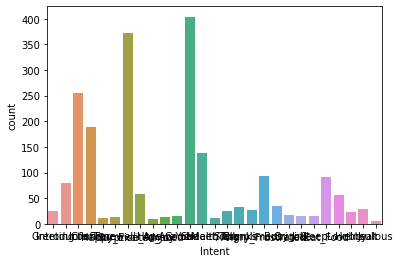

In [ ]:
sns.countplot(x = 'Intent', data = df)

In [ ]:
print('Number of Intents:', len(df['Intent'].unique()))
df['Intent'].unique()

Number of Intents: 27


array(['Greeting', 'Introduction', 'Info', 'Confirm', 'Time', 'Farewell',
       'Happy_Excited_Joy', 'Surprise_Amazed', 'Age', 'HowAreYou', 'Good',
       'Sad', 'Health', 'Meet/Talk', 'Sorry', 'Thanks', 'Compliment',
       'Angry_Frustrated', 'Busy', 'Origin', 'Joke', 'Sleep', 'Eat_Food',
       'Love', 'Hobby', 'Insult', 'Jealous'], dtype=object)

In [ ]:
import collections
counter=collections.Counter(df['Intent'])
counter

Counter({'Age': 10,
         'Angry_Frustrated': 93,
         'Busy': 34,
         'Compliment': 28,
         'Confirm': 190,
         'Eat_Food': 91,
         'Farewell': 13,
         'Good': 15,
         'Greeting': 25,
         'Happy_Excited_Joy': 372,
         'Health': 138,
         'Hobby': 23,
         'HowAreYou': 13,
         'Info': 255,
         'Insult': 29,
         'Introduction': 80,
         'Jealous': 6,
         'Joke': 16,
         'Love': 57,
         'Meet/Talk': 11,
         'Origin': 18,
         'Sad': 404,
         'Sleep': 16,
         'Sorry': 25,
         'Surprise_Amazed': 58,
         'Thanks': 33,
         'Time': 11})

# 2. Pre-processing text data


## 2.1 Remove Punctuations

In [1]:
#Read emojis text dataset
#Remove emojis and replace them with the corresponding text

emojis = pd.read_csv(resource_root_path+'emojis.txt',sep=',',header=None)
emojis_dict = {i:j for i,j in zip(emojis[0],emojis[1])}
pattern = '|'.join(sorted(re.escape(k) for k in emojis_dict))

def replace_emojis(text):
    text = re.sub(pattern,lambda m: emojis_dict.get(m.group(0)), text, flags=re.IGNORECASE)
    return text

#Remove punctuation from the text
def remove_punct(text):
    text = replace_emojis(text)
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

#Remove and replace contractions from the text 
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am","im":"i am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)

def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

NameError: ignored

## 2.2 Tokenization

In [ ]:
#Splits text into tokens (smaller bits of text)
def tokenization(text):
    text = text.lower()
    text = re.split('\W+', text)
    return text

## 2.3 Remove Stopwords

In [2]:
#Download stopwords package 
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
#stopword.extend(['yr', 'year', 'woman', 'man', 'girl','boy','one', 'two', 'sixteen', 'yearold', 'fu', 'weeks', 'week',
        #      'treatment', 'associated', 'patients', 'may','day', 'case','old','u','n','didnt','ive','ate','feel','keep'
            #    ,'brother','dad','basic','im'])

NameError: ignored

In [ ]:
#Remove stopwords from text e.g. and, or.
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

## 2.4 Lemmatization

In [ ]:
#Download wordnet package
#Lemmatize words (get the root of the word)
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Process Clean Text


In [ ]:
#Puts together all the steps needed to clean the data
def clean_text(text):
    text = replace_contractions(text)
    text = remove_punct(text)
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizer(text)
    return text

# 3. Feature Extraction

    

## 3.1 Count Vectorizer


Vocabulary:  {'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
Encoded Document is:
[[1 1 0 2 0 1 1]
 [0 0 1 1 1 1 0]]
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


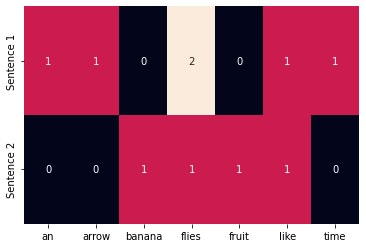

In [ ]:
#Example text to analyse the outcome
document = ["My mom was so happy that I came back home and she hugged me!"]
  
#Create a CountVectorizer Object
vectorizer = CountVectorizer() 
vectorizer.fit(document)
  
#Print the identified words and their indices
print("Vocabulary: ", vectorizer.vocabulary_)
vector = vectorizer.transform(document)
  
#Print out the encoded text 
print("Encoded Document is:")
print(vector.toarray())

dictionary = sorted(vectorizer.vocabulary_)
print(dictionary)

sns.heatmap(vector.toarray(), annot=True, cbar=False, xticklabels=dictionary,
                                             yticklabels=['Sentence 1'])

## 3.2 TF-IDF

[[0.42519636 0.42519636 0.         0.60506143 0.         0.30253071
  0.42519636]
 [0.         0.         0.57615236 0.40993715 0.57615236 0.40993715
  0.        ]]
{'time': 6, 'flies': 3, 'like': 5, 'an': 0, 'arrow': 1, 'fruit': 4, 'banana': 2}
['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']


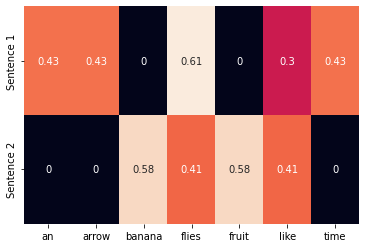

In [ ]:
#Import TF-IDF Vectorizer from the sciit learn library
from sklearn.feature_extraction.text import TfidfVectorizer
#Initialise a phrase to analyse 
document = ['My mom was so happy that I came back home and she hugged me!']
#Creat a TF-IDF Vectorizer Object and then print it 
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(document).toarray()
print (tfidf)
print (tfidf_vectorizer.vocabulary_)

dictionary = sorted(tfidf_vectorizer.vocabulary_)
print(dictionary)

sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=dictionary,
                                           yticklabels=['Sentence 1','Sentence 2'])

#### Apply Model on DataSet 

In [ ]:
#Split test and train from the data set
X_train, X_test, y_train, y_test = train_test_split(df['User'], df['Intent'],test_size=0.25, random_state = 32)

In [ ]:
#Apply Count Vectorizer and TF-IDF on test and train data
countVectorizer1 = CountVectorizer(analyzer=clean_text)

countVector1 = countVectorizer1.fit_transform(X_train)
countVector2 = countVectorizer1.transform(X_test)

tfidf_transformer_xtrain = TfidfTransformer()
x_train = tfidf_transformer_xtrain.fit_transform(countVector1)

tfidf_transformer_xtest = TfidfTransformer()
x_test = tfidf_transformer_xtest.fit_transform(countVector2)

# 4. Classifier Models




## 4.1 Support Vector Machine (SVM)

In [ ]:
#Initialise SVM Model and print its Perfomance Metrics
svm = SGDClassifier()
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)
#Accuracy score is the number of correct predictions
svm_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
svm_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
svm_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 72.868
Precision: 69.271
Recall: 64.790
F1-score: 64.775
                   precision    recall  f1-score   support

              Age       0.00      0.00      0.00         1
 Angry_Frustrated       0.72      0.52      0.60        25
             Busy       0.86      0.60      0.71        10
       Compliment       0.43      0.75      0.55         4
          Confirm       0.65      0.63      0.64        52
         Eat_Food       0.72      0.68      0.70        19
         Farewell       0.00      0.00      0.00         2
             Good       0.67      0.50      0.57         4
         Greeting       0.75      0.75      0.75         4
Happy_Excited_Joy       0.86      0.86      0.86       104
           Health       0.85      0.76      0.80        37
            Hobby       1.00      0.43      0.60         7
        HowAreYou       1.00      0.75      0.86         4
             Info       0.64      0.60      0.62        68
           Insult       0.71      0.71      0.7

## 4.2 Logistic Regression

In [ ]:
#Initialise Logisitc Regression Model and print its Perfomance Metrics
logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

#Accuracy score is the number of correct predictions
lr_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
lr_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
lr_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
lr_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
print('Precision:', '{0:.3f}'.format(lr_prec*100))
print('Recall:', '{0:.3f}'.format(lr_recal*100))
print('F1-score:', '{0:.3f}'.format(lr_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 56.008
Precision: 43.667
Recall: 28.879
F1-score: 31.400
                   precision    recall  f1-score   support

              Age       0.00      0.00      0.00         1
 Angry_Frustrated       0.75      0.12      0.21        25
             Busy       1.00      0.30      0.46        10
       Compliment       0.00      0.00      0.00         4
          Confirm       0.49      0.52      0.50        52
         Eat_Food       0.67      0.32      0.43        19
         Farewell       0.00      0.00      0.00         2
             Good       0.00      0.00      0.00         4
         Greeting       0.50      0.25      0.33         4
Happy_Excited_Joy       0.59      0.83      0.69       104
           Health       0.94      0.43      0.59        37
            Hobby       1.00      0.14      0.25         7
        HowAreYou       0.00      0.00      0.00         4
             Info       0.52      0.50      0.51        68
           Insult       1.00      0.57      0.7

## 4.3 Random Forest Classifier


In [ ]:
#Initialise Random Forest Classifier Model and print its Perfomance Metrics
rfc = RandomForestClassifier(n_estimators=1, random_state=0)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

#Accuracy score is the number of correct predictions
rfc_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
rfc_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
rfc_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
rfc_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(rfc_acc*100))
print('Precision:', '{0:.3f}'.format(rfc_prec*100))
print('Recall:', '{0:.3f}'.format(rfc_recal*100))
print('F1-score:', '{0:.3f}'.format(rfc_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 48.450
Precision: 44.200
Recall: 40.760
F1-score: 38.363
                   precision    recall  f1-score   support

              Age       0.00      0.00      0.00         1
 Angry_Frustrated       0.50      0.36      0.42        25
             Busy       0.75      0.30      0.43        10
       Compliment       0.00      0.00      0.00         4
          Confirm       0.38      0.38      0.38        52
         Eat_Food       0.56      0.47      0.51        19
         Farewell       0.00      0.00      0.00         2
             Good       0.50      0.25      0.33         4
         Greeting       0.11      0.50      0.18         4
Happy_Excited_Joy       0.55      0.54      0.55       104
           Health       0.46      0.46      0.46        37
            Hobby       1.00      0.14      0.25         7
        HowAreYou       0.00      0.00      0.00         4
             Info       0.53      0.46      0.49        68
           Insult       0.44      0.57      0.5

## 4.4 Multinomial Naive Bayes Classifier

In [ ]:
#Initialise MultiNomial Niav Bayes Classifier
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

y_pred = mnb.predict(x_test)

#Accuracy score is the number of correct predictions
mnb_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
mnb_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
mnb_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 44.186
Precision: 10.670
Recall: 9.334
F1-score: 7.555
                   precision    recall  f1-score   support

              Age       0.00      0.00      0.00         1
 Angry_Frustrated       0.00      0.00      0.00        25
             Busy       0.00      0.00      0.00        10
       Compliment       0.00      0.00      0.00         4
          Confirm       0.54      0.27      0.36        52
         Eat_Food       0.00      0.00      0.00        19
         Farewell       0.00      0.00      0.00         2
             Good       0.00      0.00      0.00         4
         Greeting       0.00      0.00      0.00         4
Happy_Excited_Joy       0.51      0.84      0.64       104
           Health       1.00      0.03      0.05        37
            Hobby       0.00      0.00      0.00         7
        HowAreYou       0.00      0.00      0.00         4
             Info       0.45      0.46      0.45        68
           Insult       0.00      0.00      0.00 

## 4.5 Decision Tree Classifier

In [ ]:
#Initialise Decision Tree Classifier
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

#Accuracy score is the number of correct predictions
dt_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
dt_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
dt_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 53.876
Precision: 52.792
Recall: 47.684
F1-score: 47.688
                   precision    recall  f1-score   support

              Age       0.00      0.00      0.00         1
 Angry_Frustrated       0.75      0.36      0.49        25
             Busy       0.43      0.30      0.35        10
       Compliment       0.60      0.75      0.67         4
          Confirm       0.30      0.38      0.34        52
         Eat_Food       0.64      0.37      0.47        19
         Farewell       0.00      0.00      0.00         2
             Good       0.25      0.25      0.25         4
         Greeting       0.67      0.50      0.57         4
Happy_Excited_Joy       0.64      0.64      0.64       104
           Health       0.58      0.57      0.58        37
            Hobby       0.80      0.57      0.67         7
        HowAreYou       0.00      0.00      0.00         4
             Info       0.64      0.54      0.59        68
           Insult       1.00      0.57      0.7

# 4.6 Multi Layer Perception

In [ ]:
#Initialise Multi Layer Perception
mlp = MLPClassifier(random_state=5, max_iter=300)

mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

#Accuracy score is the number of correct predictions
mlp_acc = accuracy_score(y_pred, y_test)
#Precision score is the ability of the classifier not to label as positive a sample that is negative
mlp_prec = precision_score(y_test, y_pred, average='macro')
#Recall score measures the model's ability to detect positive samples
mlp_recal = recall_score(y_test, y_pred, average='macro')
#F1 Score is the balance between precision and recall
mlp_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mlp_acc*100))
print('Precision:', '{0:.3f}'.format(mlp_prec*100))
print('Recall:', '{0:.3f}'.format(mlp_recal*100))
print('F1-score:', '{0:.3f}'.format(mlp_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 70.930
Precision: 65.781
Recall: 61.862
F1-score: 61.241
                   precision    recall  f1-score   support

              Age       0.00      0.00      0.00         1
 Angry_Frustrated       0.81      0.52      0.63        25
             Busy       0.86      0.60      0.71        10
       Compliment       0.50      0.75      0.60         4
          Confirm       0.62      0.56      0.59        52
         Eat_Food       0.68      0.68      0.68        19
         Farewell       0.00      0.00      0.00         2
             Good       0.40      0.50      0.44         4
         Greeting       0.75      0.75      0.75         4
Happy_Excited_Joy       0.81      0.83      0.82       104
           Health       0.82      0.76      0.79        37
            Hobby       0.75      0.43      0.55         7
        HowAreYou       1.00      0.50      0.67         4
             Info       0.66      0.63      0.65        68
           Insult       0.83      0.71      0.7

In [ ]:
def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))
        
    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))
        
    return per_emotion_precision, per_emotion_recall

## Accuracy For All Models

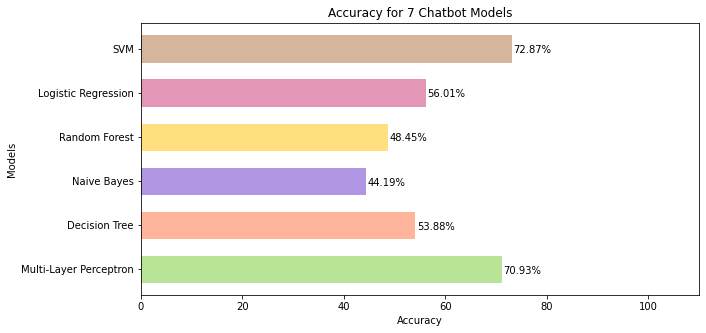

In [ ]:
#Visualise the Accuracy of all Models together 
algorithms = ['Multi-Layer Perceptron','Decision Tree','Naive Bayes','Random Forest','Logistic Regression','SVM']
algorithm_acc = [mlp_acc*100, dt_acc*100, mnb_acc*100, rfc_acc*100, lr_acc*100, svm_acc*100]
 
fig = plt.figure(figsize =(10, 5))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')
bar_list[5].set_color('#D5B59C')
bar_list[4].set_color('#E396B6')
bar_list[3].set_color('#FFDF80')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#FFB49C')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 7 Chatbot Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)
plt.savefig(root_path+'/Chatbot Accuracy_7 models.jpg')
plt.show()

## Precision For All Models

In [ ]:
#Visualise Precision of all models
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
rfc_per_prec,rfc_per_recall = get_prec_recall_per_emotion(rfc_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)
mlp_per_prec,mlp_per_recall = get_prec_recall_per_emotion(mlp_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'Random Forest' : rfc_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec,
                                'Multi Layer Perceptron' : mlp_per_prec}, 
                                index=svm.classes_)
per_precision_list

In [ ]:
#Save all the models in a pickle file
with open(root_path+'/ChatbotModels.pkl', 'wb') as f:
    pickle.dump([svm, logisticRegr, rfc, mnb, dt, mlp], f)

In [ ]:
#Load all saved Models 
if os.path.isfile(root_path+'/ChatbotModels.pkl'):
    # Getting back the objects:
    with open(root_path+'/ChatbotModels.pkl','rb') as f:  
        svm, logisticRegr, rfc, mnb, dt, mlp = pickle.load(f)
        print('File Loaded Successfully')
else:
    print('File not Found')

File Loaded Successfully


# 6. Measure Intent 

In [ ]:
#Function to create replies 
def generate_replies(text, intent_name):
    reply = respond(text, intent_name)

    return reply

In [ ]:
#Measure the Cosine Distance 
def cosine_distance_CountVectorizer(s1, s2):

    allsentences = [s1 , s2]
    
    #Initialise Count Vectorizer
    vectorizer = CountVectorizer()
    all_sentences_to_vector = vectorizer.fit_transform(allsentences)

    text_to_vector_v1 = all_sentences_to_vector.toarray()[0].tolist()
    text_to_vector_v2 = all_sentences_to_vector.toarray()[1].tolist()
    #Find the cosine distance 
    cosine = distance.cosine(text_to_vector_v1, text_to_vector_v2)
    return round((1-cosine),2)

In [ ]:
#Chatbot reply based on intent 
def reply(text, intent_name):
    maximum = float('-inf')
    replies = {}
    list_sim, list_replies = [],[]
    dataset = df[df['Intent']==intent_name]
    for i in dataset.iterrows():
        sim = cosine_distance_CountVectorizer(text, i[1]['User'])
        list_sim.append(sim)
        list_replies.append(i[1]['Chatbot'])

    for i in range(len(list_sim)):
        if list_sim[i] in replies:
            replies[list_sim[i]].append(list_replies[i])
        else:
            replies[list_sim[i]] = list()
            replies[list_sim[i]].append(list_replies[i])
    d1 = sorted(replies.items(), key = lambda pair:pair[0],reverse=True)
    return d1[0][1][random.randint(0,len(d1[0][1])-1)]

### Ensemble Learning 

In [ ]:
accuracies = np.array([svm_acc, lr_acc, rfc_acc, mnb_acc, dt_acc, mlp_acc])
norm_accuracy = accuracies - min(accuracies)
model_weight = norm_accuracy / sum(norm_accuracy) 
Intents = df['Intent'].unique()
#Extract best intent from the text
def extract_best_intent(list_intent_pred):
    intent_scores = {}
    for intent in Intents:
        intent_scores[intent] = 0.0   
    for i in range(len(list_intent_pred)):
        intent_scores[list_intent_pred[i]] += model_weight[i]
    si = sorted(intent_scores.items(), key = lambda pair:pair[1],reverse=True)[:7]
    return si[0][0],si

Weight of Models

In [ ]:
accuracies = np.array([svm_acc, lr_acc, rfc_acc, mnb_acc, dt_acc, mlp_acc])
norm_accuracy = accuracies - min(accuracies)
model_weight = norm_accuracy / sum(norm_accuracy)
model_weight

array([0.35322196, 0.14558473, 0.05250597, 0.        , 0.11933174,
       0.32935561])

In [ ]:
while True:
    input_str = input("Hi! How are you? ")
    if input_str == 'Exit':
        break
        
    processed_text = tfidf_transformer_xtest.fit_transform(countVectorizer1.transform([input_str]))
    print('Intent using SVM: ',end = '')
    svm_intent = svm.predict(processed_text)[0]
    lr_intent = logisticRegr.predict(processed_text)[0]
    dt_intent = dt.predict(processed_text)[0]
    mnb_intent = mnb.predict(processed_text)[0]
    rfc_intent = rfc.predict(processed_text)[0]
    mlp_intent = mlp.predict(processed_text)[0]
    print(svm_intent)
    
    print('Intent using Logistic Regression: ',end = '')
    print(logisticRegr.predict(processed_text))
    print('Intent using Decision Tree: ',end = '')
    print(dt.predict(processed_text))
    print('Intent using Naive Bayes: ',end = '')
    print(mnb.predict(processed_text))
    print('Intent using Random Forest: ',end = '')
    print(rfc.predict(processed_text))
    print('Intent using Multi Layer Perceptron: ',end = '')
    print(mlp.predict(processed_text))


    #Generates a reply
    list_intent = [svm_intent, lr_intent, rfc_intent, mnb_intent, dt_intent, mlp_intent]
    best_intent, si = extract_best_intent(list_intent)
    print(si)
    print('Best Intent:',best_intent)
    print('Bot: ',generate_replies(input_str, best_intent))
    print()